## Task 3. Customer Clustering

Downloading Dataset

In [ ]:
import gdown

file_ids = [
    '1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE',
    '1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0',
    '1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'
]

output_files = ['Customers.csv', 'Products.csv', 'Transactions.csv']

for file_id, output in zip(file_ids, output_files):
    url = f'https://drive.google.com/uc?export=download&id={file_id}'
    gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/Customers.csv
100%|██████████| 8.54k/8.54k [00:00<00:00, 18.0MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: /content/Products.csv
100%|██████████| 4.25k/4.25k [00:00<00:00, 10.5MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/Transactions.csv
100%|██████████| 54.7k/54.7k [00:00<00:00, 4.87MB/s]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge the datasets
merged_data = transactions.merge(customers, on='CustomerID')

# Feature Engineering
# Aggregate transaction data
transaction_features = merged_data.groupby('CustomerID').agg(
    TotalValue=('TotalValue', 'sum'),
    AverageTransactionValue=('TotalValue', 'mean'),
    Frequency=('TransactionID', 'count')
).reset_index()

# Combine with customer profile features
customer_profiles = customers.merge(transaction_features, on='CustomerID')

# Select relevant features for clustering
features = customer_profiles[['TotalValue', 'AverageTransactionValue', 'Frequency']]

Feature Scaling

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Determining optimal number of clusters and calculating DB Score

In [ ]:
# Define the range of clusters to evaluate
range_n_clusters = range(2, 11)
db_index_values = []

# Perform K-Means clustering for different cluster sizes
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_

    # Calculate the Davies-Bouldin Index
    db_index = davies_bouldin_score(scaled_features, labels)
    db_index_values.append(db_index)

# Find the optimal number of clusters based on the lowest DB Index
optimal_clusters = range_n_clusters[np.argmin(db_index_values)]
print(f'Optimal number of clusters: {optimal_clusters}')
print(f'Davies-Bouldin Index: {min(db_index_values)}')

Optimal number of clusters: 5
Davies-Bouldin Index: 0.8524813520458038


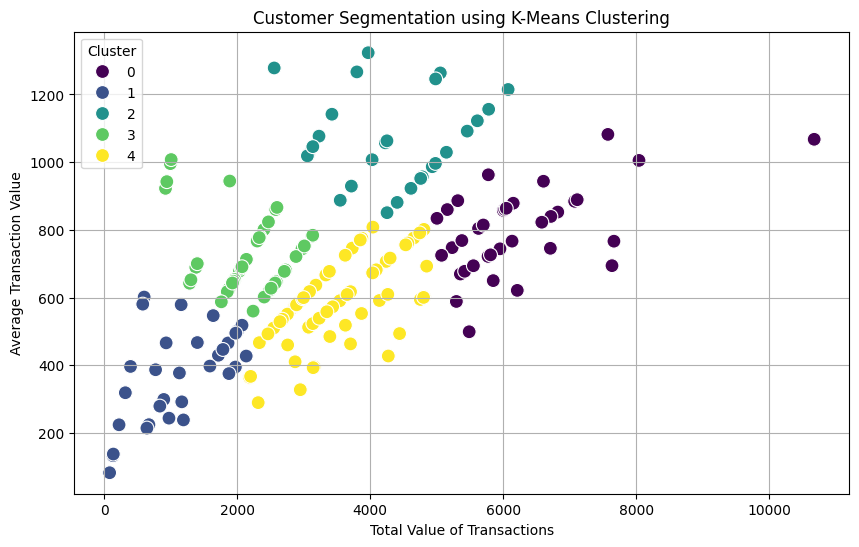

In [ ]:
# Fit the K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalValue', y='AverageTransactionValue', hue='Cluster', data=customer_profiles, palette='viridis', s=100)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Total Value of Transactions')
plt.ylabel('Average Transaction Value')
plt.legend(title='Cluster')
plt.grid()
plt.show()